### Gradiente por descenso
#### Equipo No. 6: Elena Villalobos Nolasco, Carolina Acosta Tovany y Aide Jazmín González Cruz

#### 1.- Se importan los paquetes

In [1]:
import random
import csv
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.animation as animation

from sklearn.datasets import load_iris
from matplotlib import rc

#### 2.- Cargamos los datos

In [2]:
def load_data(path, header):
    marks_df = pd.read_csv(path, header=header)
    return marks_df

data = load_data("iris_num.txt",None)
data = np.array(data)

#### 3.- Definimos nuestra función costo/objetivo (LOSS Function)

$J(\theta,\theta_0) = \frac{1}{n} \sum_{i=1}^{n} L_h (y^{(i)}(\theta^{T}x^{i} + \theta_0)) + \frac{\lambda}{2} || \theta || ^2$

In [3]:
def costo(teta,teta0,data,n,lamda):#Función Objetivo J(Ø,Ø0)
    suma = np.array([0.0])
    yi = 0.0
    #modulo = 0.0
    #modulo = (teta[0]*teta[0]) + (teta[1]*teta[1]) + (teta[2]*teta[2]) + (teta[3]*teta[3])
    modulo = (np.linalg.norm(teta)**2)
    
    for i in data:
        # Convertimos a y en -1 si no es setosa
        if(i[4] == 0.0):
            yi = -1.0
        else:
            yi = 1.0
                
        x = i[:len(i)-1]       
              
        ##(yi(ØTxi + Ø0))
        v = yi * ((np.dot(np.array(teta).transpose(),np.array(x))) + teta0)
        
        ##SUMA Lh(yi(ØTxi + Ø0))
        if v < 1.0:
            Lh = (1.0 - v)
        else:
            Lh = 0.0
            
        suma =  suma + (Lh + ((lamda/2)*modulo))
    return ((1/n)*suma)


#### 5.- Definimos nuestra función descenso por gradiente

In [4]:
def descenso_x_gradiente(data, eta, Oini, O0ini, lamda, epsilon):
        # Se crea arreglo para guardar los pesos que se van calculando               
        O = []
        O0 = []
        O.append(Oini)
        O0.append(O0ini)
        theta=[]
        
        Ot = [0.0, 0.0, 0.0, 0.0]
        Ot0 = [0.0]
        
        t = 0
        
        n = len(data)
        
        while True:  
            t = t + 1
            sumaO = np.array([0.0, 0.0, 0.0, 0.0])
            sumaO0 = np.array([0.0])
            
            for i in data:
                
                if(i[4] == 0.0):
                    yi = -1.0
                else:
                    yi = 1.0              
                                    
                x = i[:len(i)-1]
                
                ##Valida esta parte y(i)(Ø(t-1)Tx(i)+Ø0(t-1)) 
                hip = yi * ((np.dot(np.array(O[t-1]).transpose(),np.array(x))) + O0[t-1])
                
                val = 0.0
                if(hip < 1.0):
                    val = -1.0
                else:
                    val = 0.0
                    
                hip_O = (val * (yi * np.array(x))) + (lamda * O[t-1])
                hip_O0 = val * yi
                
                sumaO = sumaO + hip_O
                sumaO0 = sumaO0 + hip_O0                        
            
            Ot = O[t-1] - eta * ((1/n)*sumaO)
            Ot0 = O0[t-1] - eta * (((1/n)*sumaO0))
            
            theta.append(np.array([[Ot[0]],[Ot0]]))
            
            O = np.insert(O, t, Ot, axis=0)
            O0 = np.insert(O0, t, Ot0, axis=0)
            
            cost = abs(costo(O[t],O0[t],data,n,lamda) - costo(O[t-1],O0[t-1],data,n,lamda))     
            
                                   
            #Se corre el while hasta alcanzar el epsilon o las iteraciones son mayor a 1000 (para no tender a loop infinito)    
            if((cost < epsilon) or (t > 1000)):
                break 
        
        #print('t: ' + str(t))      
        
        #print(theta)
        return [O[t], O0[t], O, O0]
        

#### 6.- Definimos nuestra función de validación cruzada

In [5]:
random.seed(1993)

def CrossValidation(data,K):
    lamda_list = [100,10,1,0.1]
    eta = 0.01 # LearningRate
    epsilon = 0.05
    df_lamda = pd.DataFrame(0.0, index=range(1),columns=("100","10","1","0.1"))
    theta_list = []
    theta_0_list = []
    # Dividimos los datos en chunk de igual tamaño
    chunks = np.array_split(data, K)
    for lamda_ in lamda_list:
        error = 0.0
        for i in range(1,int(K)):
            
            # Inicializamos las tetas
            Oini = np.array([0.0, 0.0, 0.0, 0.0])
            O0ini = np.array([0.0])
            
            # El chunk i será nuestro bloque de datos de prueba
            test_data = chunks[i]
            
            # Entrenamos con todos los otros datos menos con el chunk[i]
            train_data = chunks.copy()
            train_data.pop(i)
            train_data = np.concatenate(train_data)
            tetas = descenso_x_gradiente(train_data, eta, Oini, O0ini, lamda_, epsilon)
            #  Obtenemos el error con la función objetivo
            error += costo(tetas[0],tetas[1],test_data,len(test_data),lamda_)
        error /= K
        
        df_lamda[str(lamda_)][0] = error
        
    return (df_lamda.idxmin(axis=1)[0])


#### 7.- Hacemos la validación cruzada sobre nuestra data

In [6]:
df_lamda = CrossValidation(data,5.0)
float(df_lamda)

/home/carotova/.pyenv/versions/3.7.4/envs/machine-learning/lib/python3.7/site-packages/ipykernel_launcher.py:48: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray


0.1

#### Conclusión:

De acuerdo al CrossValidation , debemos utilizar lambda 0.1 para obtener mejor resultados, porque tendrá menor error segun la funcion de costo. 

Estamos cosiderando un eta de 0.01 y un epsilon de 0.05

#### 8.- Volvemos a entrenar

In [27]:
#Se revuelven los datos
random.seed(1992)
random.shuffle(data)

#Datos de entrenamiento
datos_entrenamiento = data[0:120]

#Datos de verificación
data_validacion = data[121:150]


eta = 0.01
epsilon = 0.05
Oini = np.array([0.0, 0.0, 0.0, 0.0])
O0ini = np.array([0.0])

tetas = descenso_x_gradiente(datos_entrenamiento, eta, Oini, O0ini, float(df_lamda), epsilon)
#print("Teta : ", tetas[0], " \nTeta_0:", tetas[1])
#print("Teta : ", tetas[2], " \nTeta_0:", tetas[3])
slope = tetas[2]
intercept = tetas[3]

/home/carotova/.pyenv/versions/3.7.4/envs/machine-learning/lib/python3.7/site-packages/ipykernel_launcher.py:48: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray


In [8]:
##### Tomado de la clase de Animación

iris = load_iris()
X = iris.data
Y = iris.target

dir(iris)

['DESCR',
 'data',
 'feature_names',
 'filename',
 'frame',
 'target',
 'target_names']

In [9]:
iris.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [25]:
def animacs(intercept,slope,data):
    X = np.array(data[:,0:4])
    Y = np.array(data[:,4])
    
    fig, ax = plt.subplots()

    line, = ax.plot([],[],'k-')

    ax.scatter(X[Y==0,0],X[Y==0,3],c='b',label='no setosa')
    ax.scatter(X[Y==1,0],X[Y==1,3],c='r',label='setosa')
    ax.legend(loc='lower right')

    ax.set_xlabel('sepal length (cm)')
    ax.set_ylabel('Petal width (cm)')

    ax.set_xlim(4,6)
    ax.set_ylim(0,2)
    x = np.linspace(ax.get_xlim()[0],ax.get_xlim()[1],200)

    ax.grid(True)

    def anima(i):
        y =slope[i][0]*x +  intercept[i][0] 
        line.set_data(x,y)
        return line,
    animacion = animation.FuncAnimation(fig, anima, frames = len(intercept),interval=200,blit=True)
    
    return animacion
    


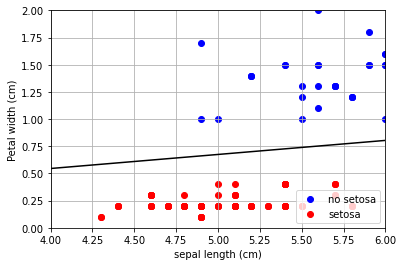

In [26]:
anim = animacs(intercept,slope,data)

rc('animation',html='jshtml')
anim